In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_config_map = {
    "pipeline_results_1node_8cpu.csv": "1-node-8cpu",
    "pipeline_results_1node_16cpu.csv": "1-node-16cpu",
    "pipeline_results_local.csv": "local",         
    "pipeline_results_2nodes_8+8cpu.csv": "2-node-8cpu",   
    "pipeline_results_3nodes_8+8+8cpu.csv": "3-node-8cpu"          
}

In [3]:

df_list = []
for file, label in file_config_map.items():
    try:
        temp_df = pd.read_csv(r"/workspaces/JetStream2_Benchmarking/results/{}".format(file))
        temp_df["config"] = label
        df_list.append(temp_df)
    except FileNotFoundError:
        print(f"{file} not found. Skipping...")

df_combined = pd.concat(df_list, ignore_index=True)

# Compute average metrics per configuration
metrics = ["total_time", "t_ingest", "t_bronze", "t_silver", "t_gold", 
           "cpu_bronze", "cpu_silver", "cpu_gold", 
           "mem_bronze", "mem_silver", "mem_gold",
           "throughput_bronze", "throughput_silver", "throughput_gold", 
           "write_bronze", "write_silver", "write_gold"]
df_avg = df_combined.groupby("config")[metrics].mean().reset_index()


In [4]:
df_combined[df_combined['run']==23][['total_time', 't_bronze', 't_silver', 't_gold']]

,total_time,t_bronze,t_silver,t_gold
22,563.92,45.057794,109.986870,408.861190
52,441.75,61.329905,87.914224,292.487705
82,452.44,45.248917,125.549016,281.315323
112,551.09,43.948443,113.342877,393.790061
142,577.93,47.341329,119.780498,410.791751


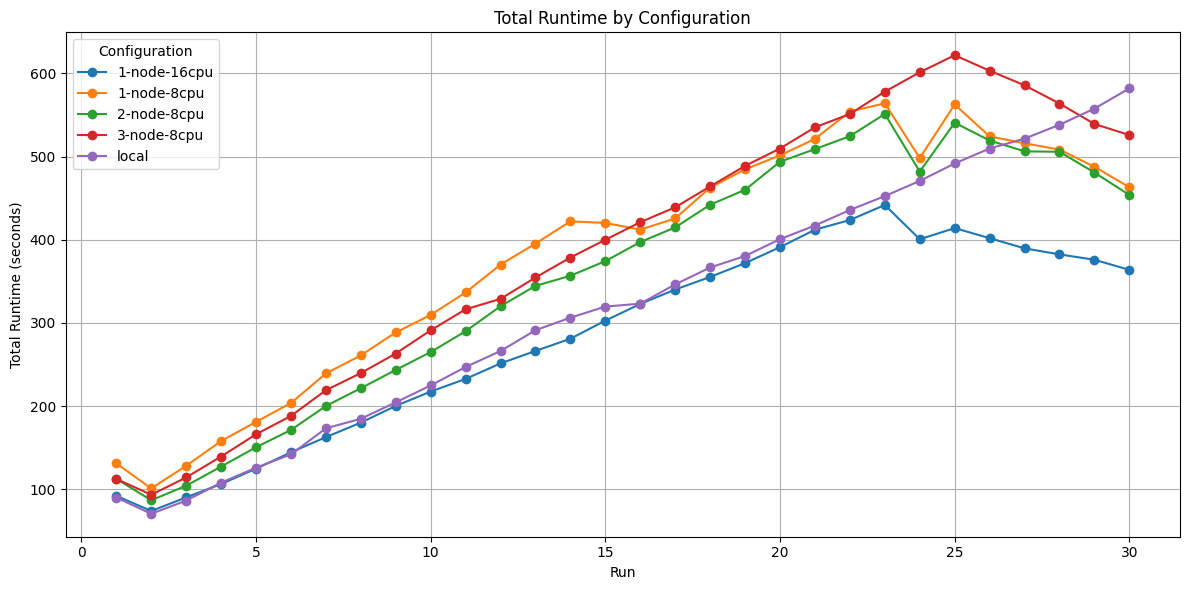

In [5]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["total_time"], marker='o', label=config)

plt.title("Total Runtime by Configuration")
plt.xlabel("Run")
plt.ylabel("Total Runtime (seconds)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

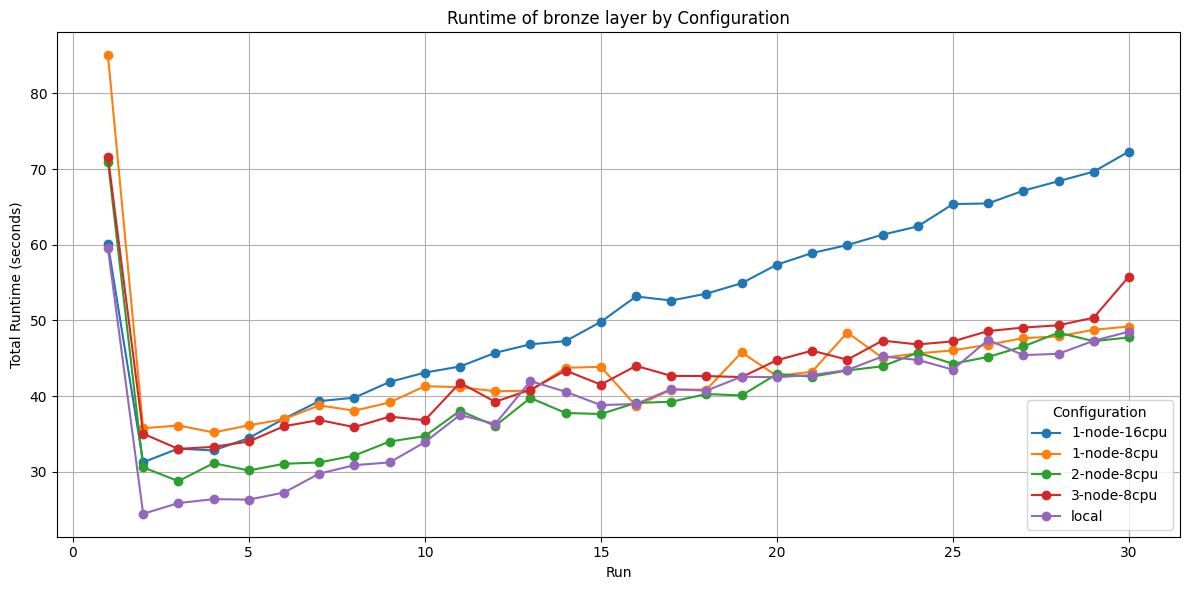

In [6]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["t_bronze"], marker='o', label=config)

plt.title("Runtime of bronze layer by Configuration")
plt.xlabel("Run")
plt.ylabel("Total Runtime (seconds)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

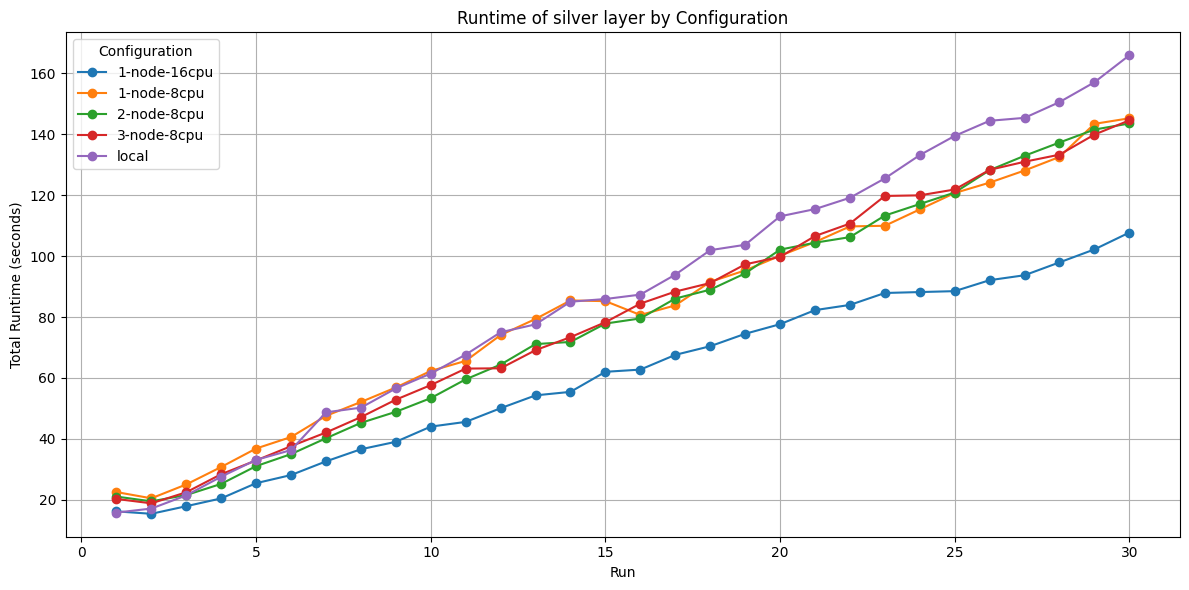

In [7]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["t_silver"], marker='o', label=config)

plt.title("Runtime of silver layer by Configuration")
plt.xlabel("Run")
plt.ylabel("Total Runtime (seconds)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

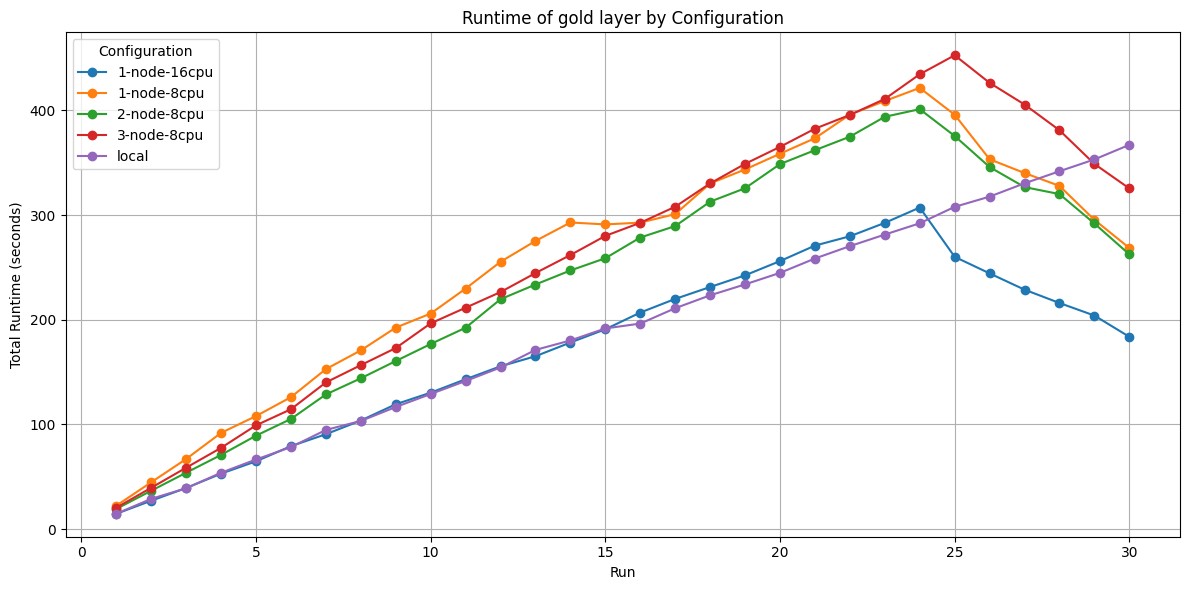

In [8]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["t_gold"], marker='o', label=config)

plt.title("Runtime of gold layer by Configuration")
plt.xlabel("Run")
plt.ylabel("Total Runtime (seconds)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

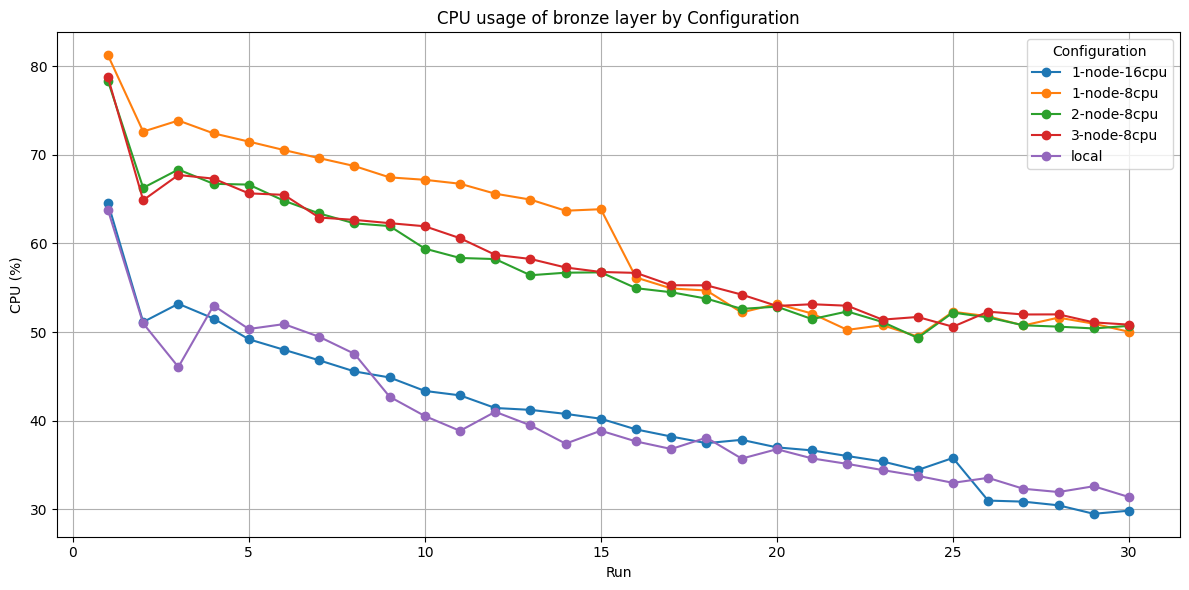

In [9]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["cpu_bronze"], marker='o', label=config)

plt.title("CPU usage of bronze layer by Configuration")
plt.xlabel("Run")
plt.ylabel("CPU (%)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

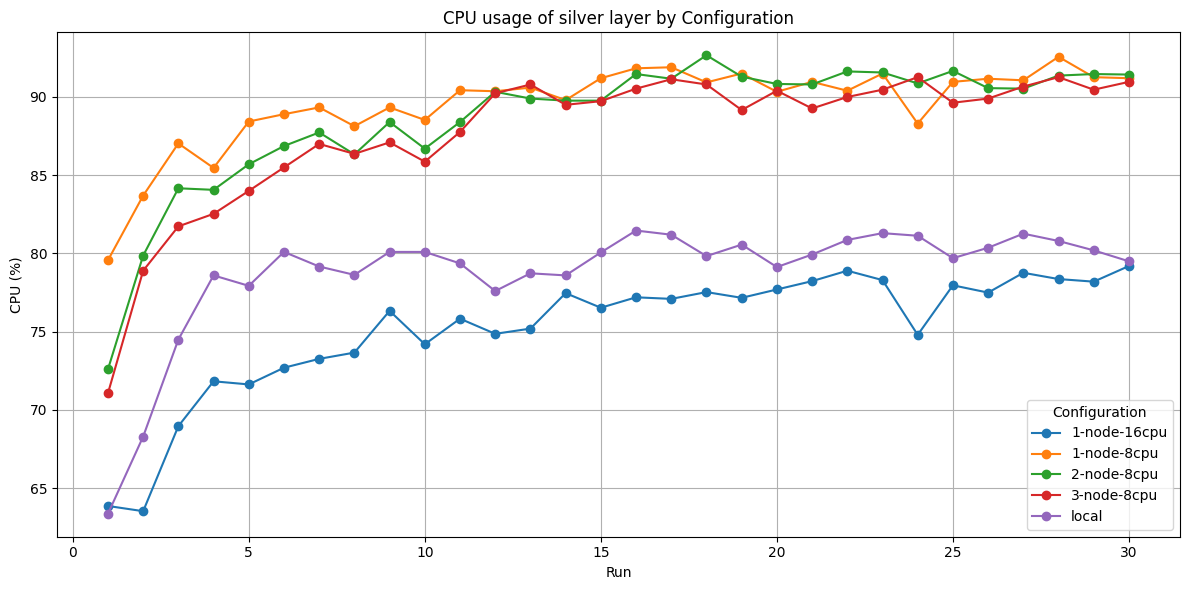

In [10]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["cpu_silver"], marker='o', label=config)

plt.title("CPU usage of silver layer by Configuration")
plt.xlabel("Run")
plt.ylabel("CPU (%)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

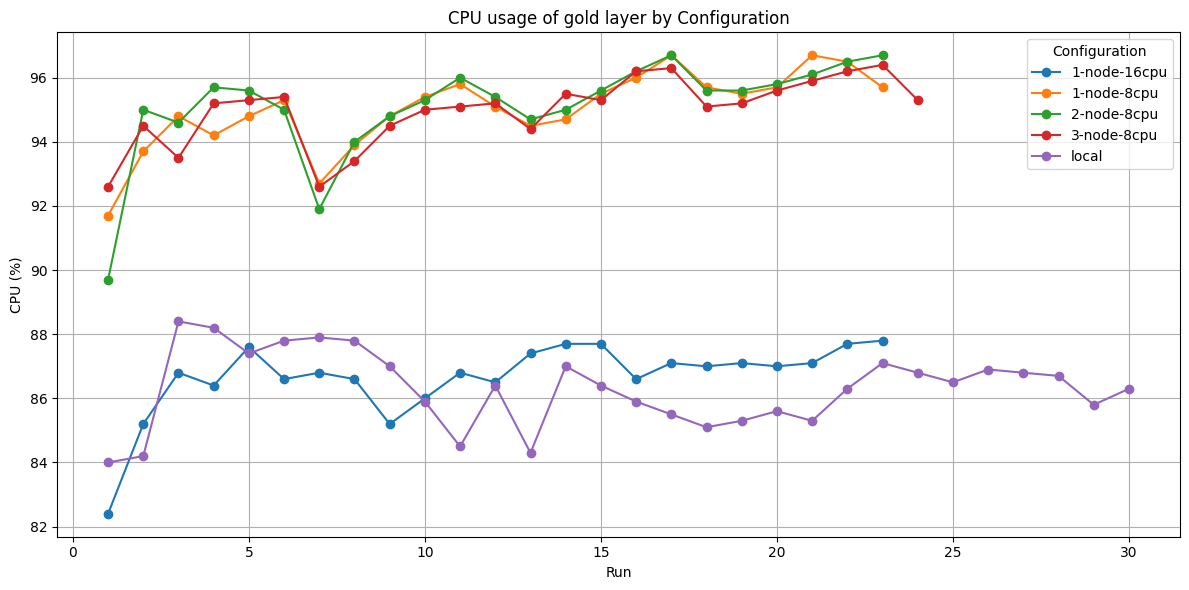

In [11]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["cpu_gold"], marker='o', label=config)

plt.title("CPU usage of gold layer by Configuration")
plt.xlabel("Run")
plt.ylabel("CPU (%)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

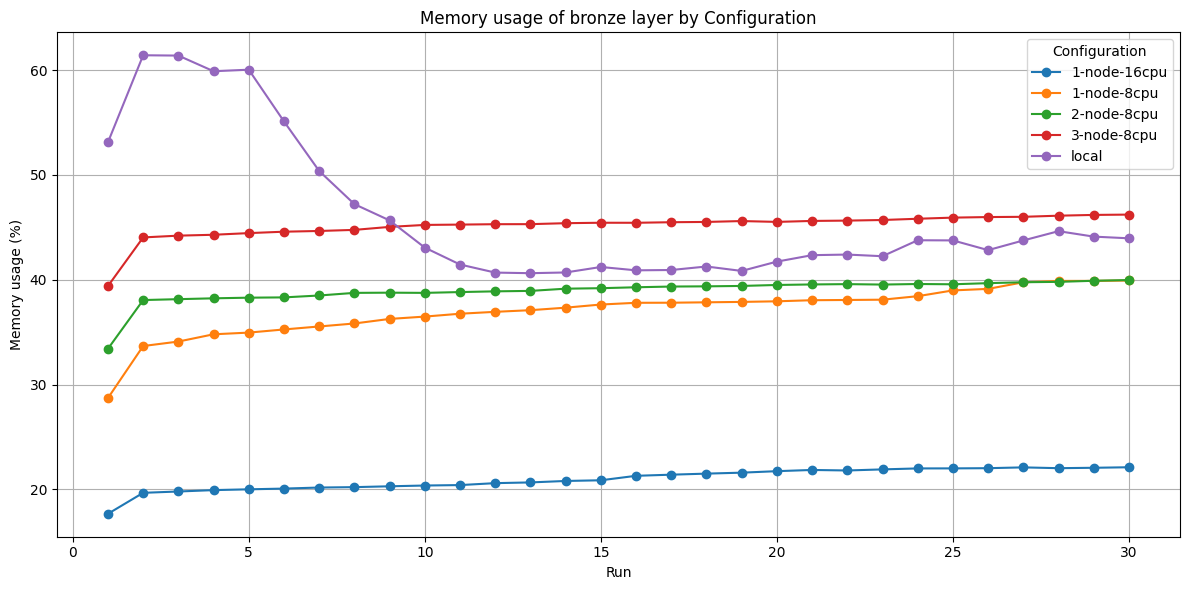

In [12]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["mem_bronze"], marker='o', label=config)

plt.title("Memory usage of bronze layer by Configuration")
plt.xlabel("Run")
plt.ylabel("Memory usage (%)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

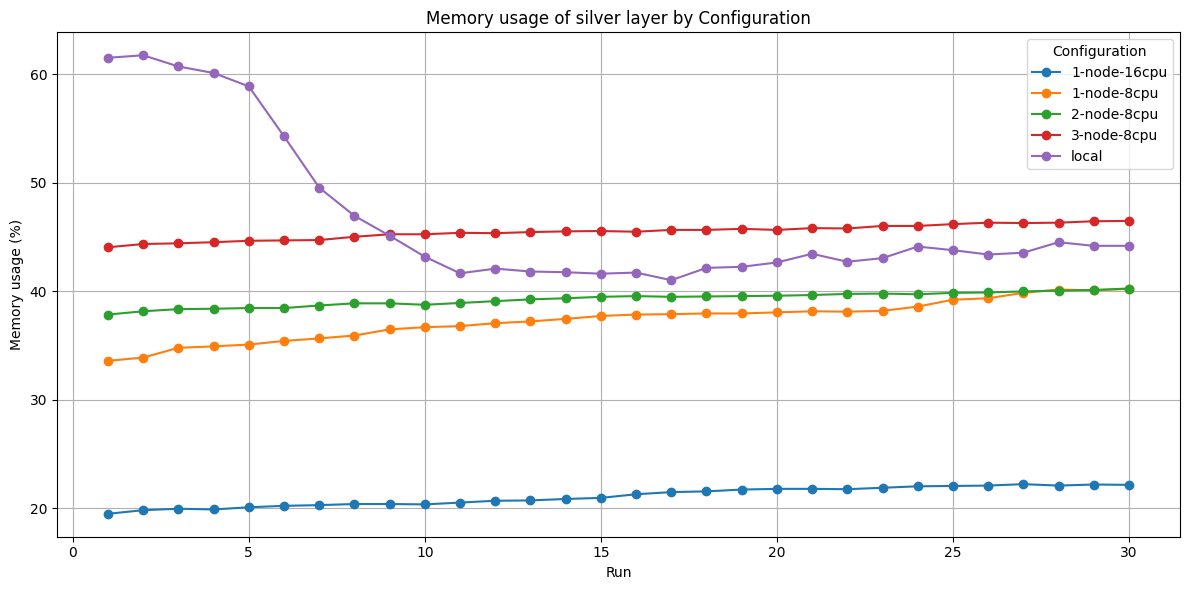

In [13]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["mem_silver"], marker='o', label=config)

plt.title("Memory usage of silver layer by Configuration")
plt.xlabel("Run")
plt.ylabel("Memory usage (%)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

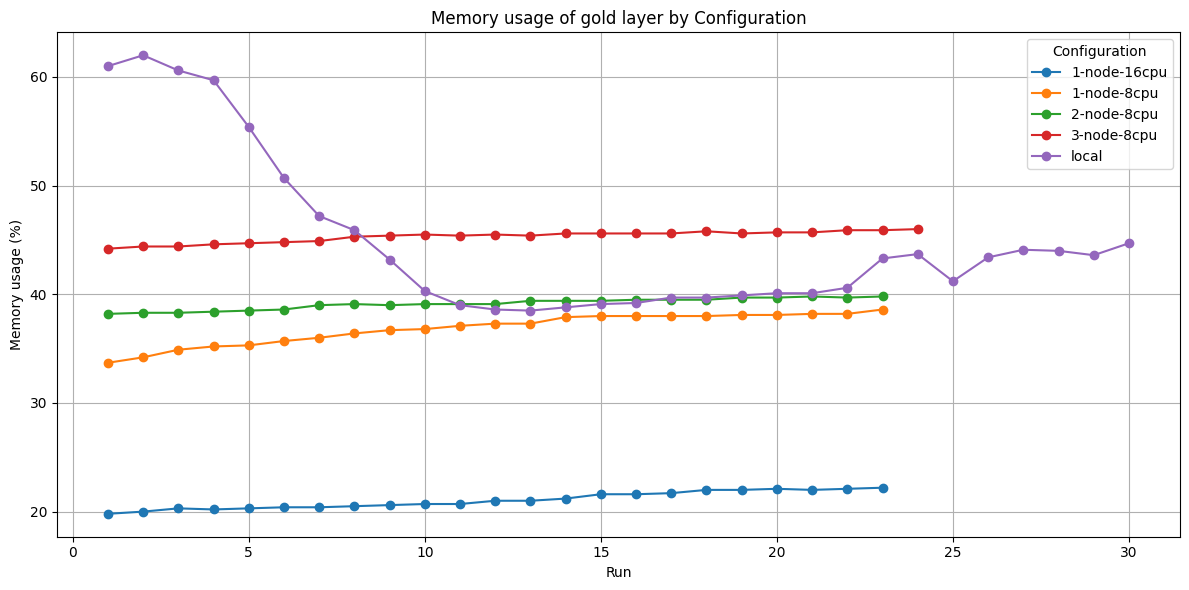

In [14]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["mem_gold"], marker='o', label=config)

plt.title("Memory usage of gold layer by Configuration")
plt.xlabel("Run")
plt.ylabel("Memory usage (%)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

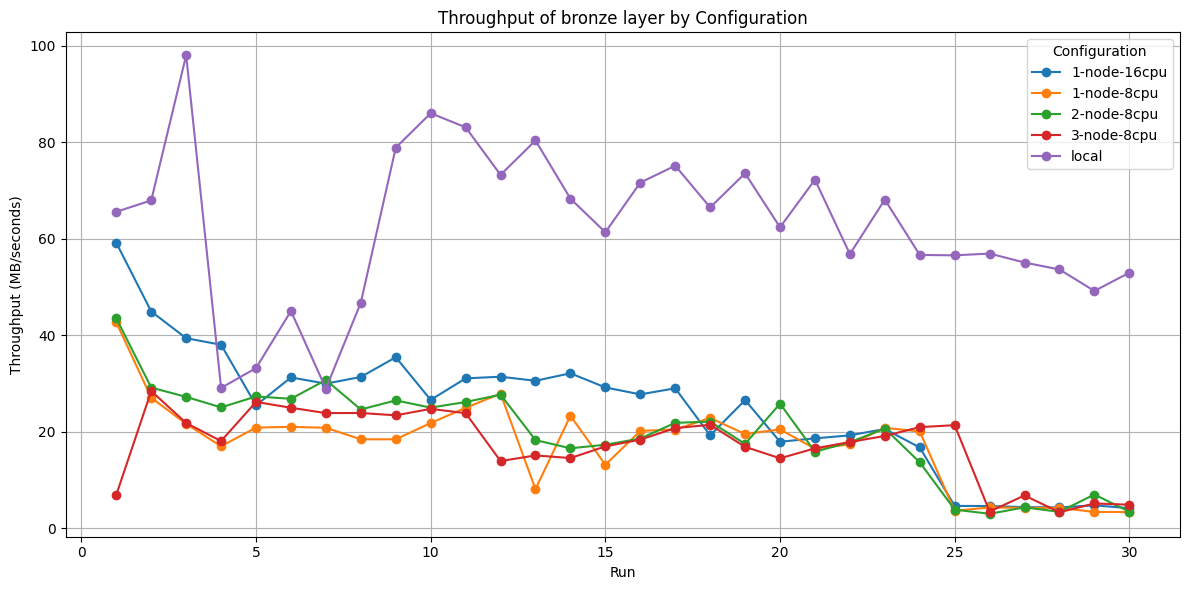

In [15]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["throughput_bronze"], marker='o', label=config)

plt.title("Throughput of bronze layer by Configuration")
plt.xlabel("Run")
plt.ylabel("Throughput (MB/seconds)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

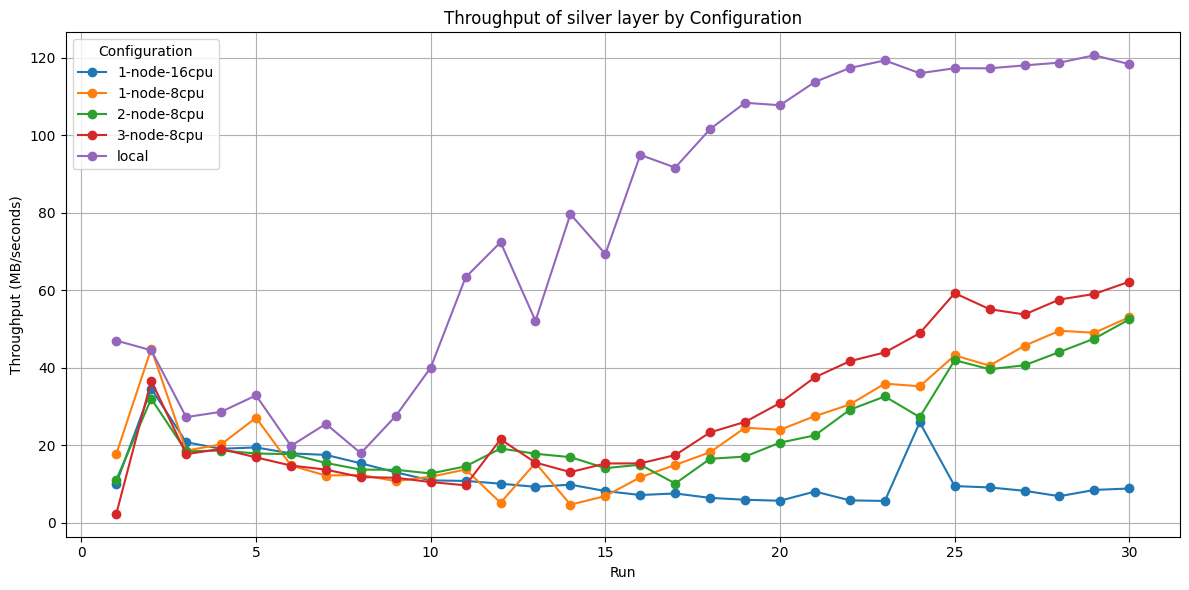

In [16]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["throughput_silver"], marker='o', label=config)

plt.title("Throughput of silver layer by Configuration")
plt.xlabel("Run")
plt.ylabel("Throughput (MB/seconds)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

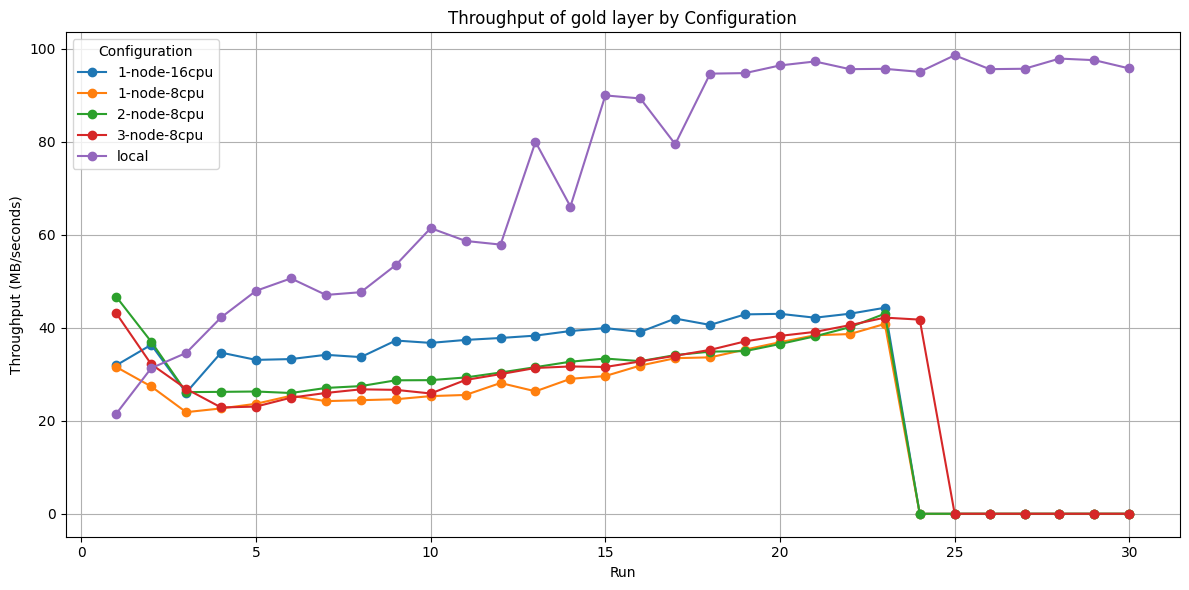

In [17]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["throughput_gold"], marker='o', label=config)

plt.title("Throughput of gold layer by Configuration")
plt.xlabel("Run")
plt.ylabel("Throughput (MB/seconds)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

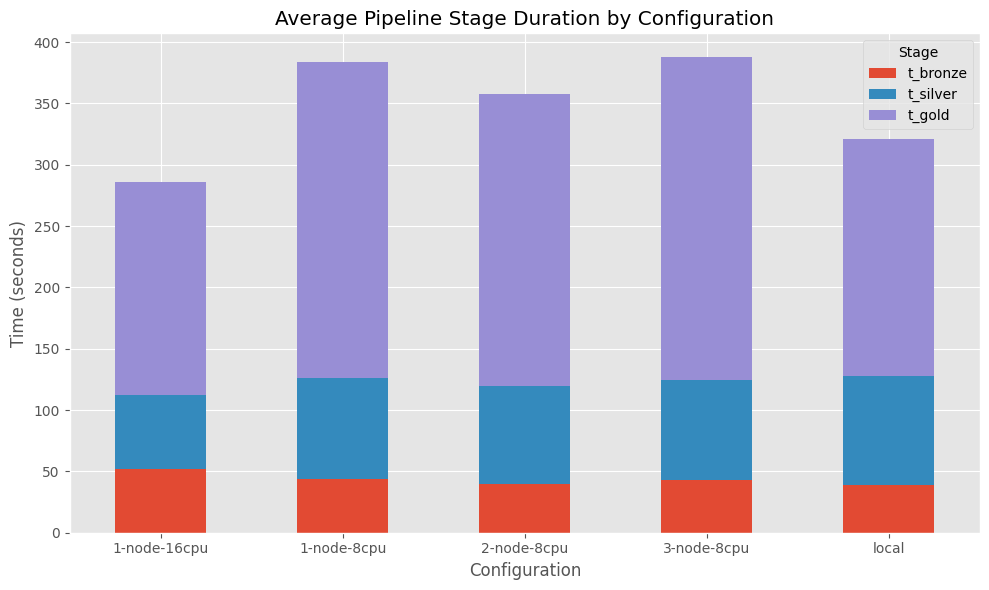

In [18]:
plt.style.use('ggplot')
stage_columns = ["t_bronze", "t_silver", "t_gold"]
df_avg.set_index("config")[stage_columns].plot(
    kind="bar", 
    stacked=True,
    figsize=(10, 6)
)

plt.title("Average Pipeline Stage Duration by Configuration")
plt.ylabel("Time (seconds)")
plt.xlabel("Configuration")
plt.xticks(rotation=0)
plt.legend(title="Stage")
plt.tight_layout()
plt.show()

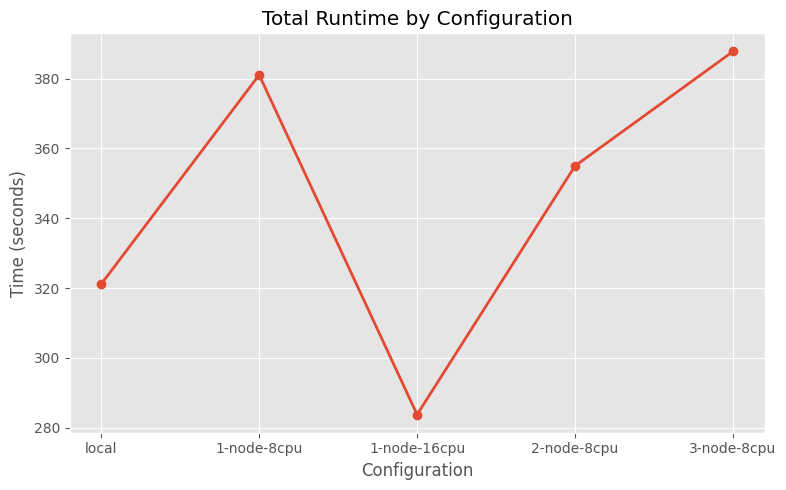

In [19]:
config_order = ["local", "1-node-8cpu", "1-node-16cpu", "2-node-8cpu", "3-node-8cpu"]
df_avg["config"] = pd.Categorical(df_avg["config"], categories=config_order, ordered=True)
df_avg = df_avg.sort_values("config")

# Plot total runtime as a line chart
plt.figure(figsize=(8, 5))
plt.plot(df_avg["config"], df_avg["total_time"], marker='o', linewidth=2)

plt.title("Total Runtime by Configuration")
plt.ylabel("Time (seconds)")
plt.xlabel("Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

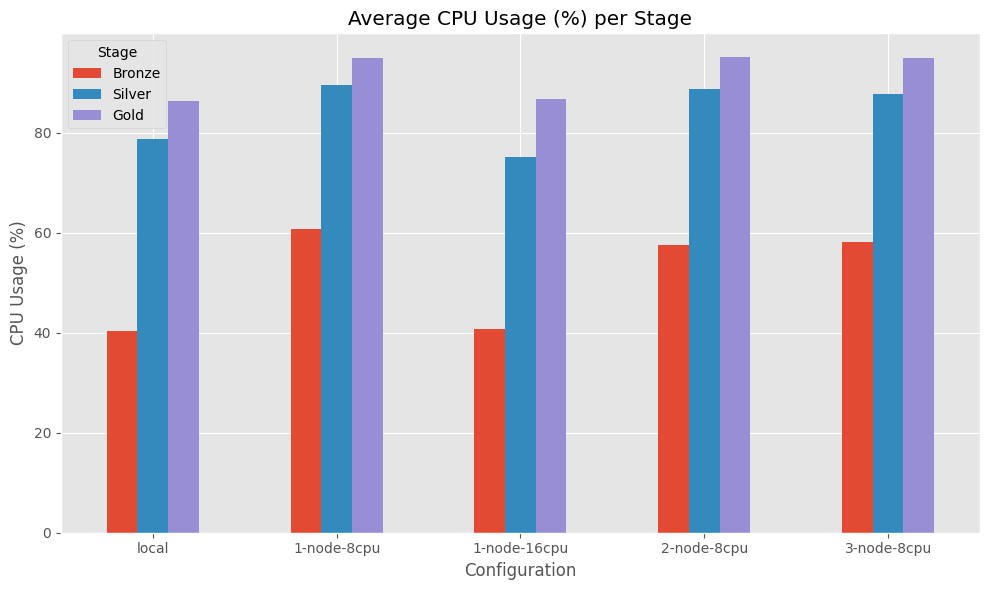

In [20]:
cpu_cols = ["cpu_bronze", "cpu_silver", "cpu_gold"]
df_avg_cpu = df_avg[["config"] + cpu_cols].set_index("config")

# Rename columns for prettier labels
df_avg_cpu.columns = ["Bronze", "Silver", "Gold"]

# Plot
df_avg_cpu.plot(kind="bar", figsize=(10, 6))
plt.title("Average CPU Usage (%) per Stage")
plt.ylabel("CPU Usage (%)")
plt.xlabel("Configuration")
plt.xticks(rotation=0)
plt.legend(title="Stage")
plt.tight_layout()
plt.show()

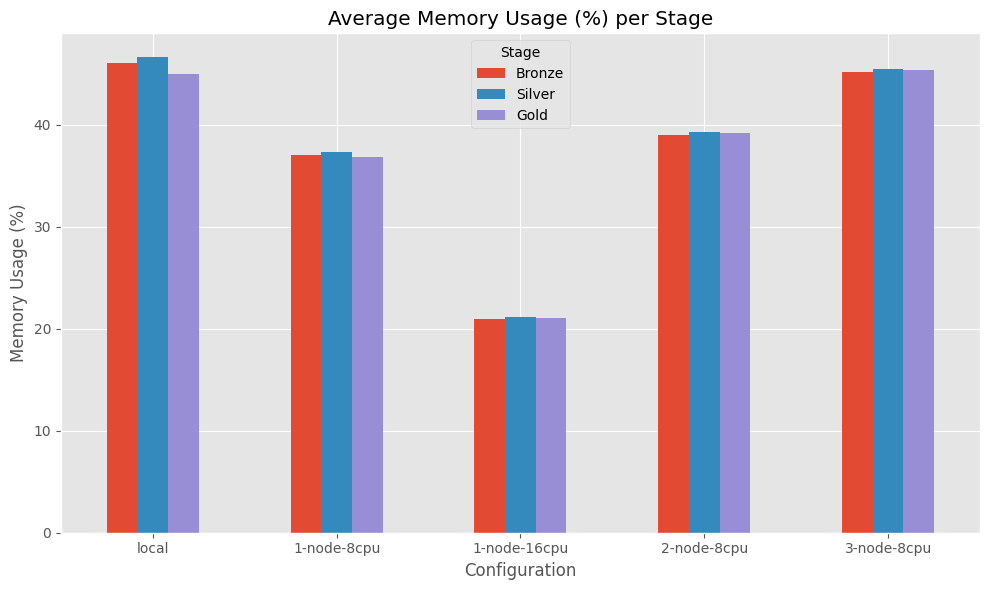

In [21]:
mem_cols = ["mem_bronze", "mem_silver", "mem_gold"]
df_avg_mem = df_avg[["config"] + mem_cols].set_index("config")
df_avg_mem.columns = ["Bronze", "Silver", "Gold"]

df_avg_mem.plot(kind="bar", figsize=(10, 6))
plt.title("Average Memory Usage (%) per Stage")
plt.ylabel("Memory Usage (%)")
plt.xlabel("Configuration")
plt.xticks(rotation=0)
plt.legend(title="Stage")
plt.tight_layout()
plt.show()

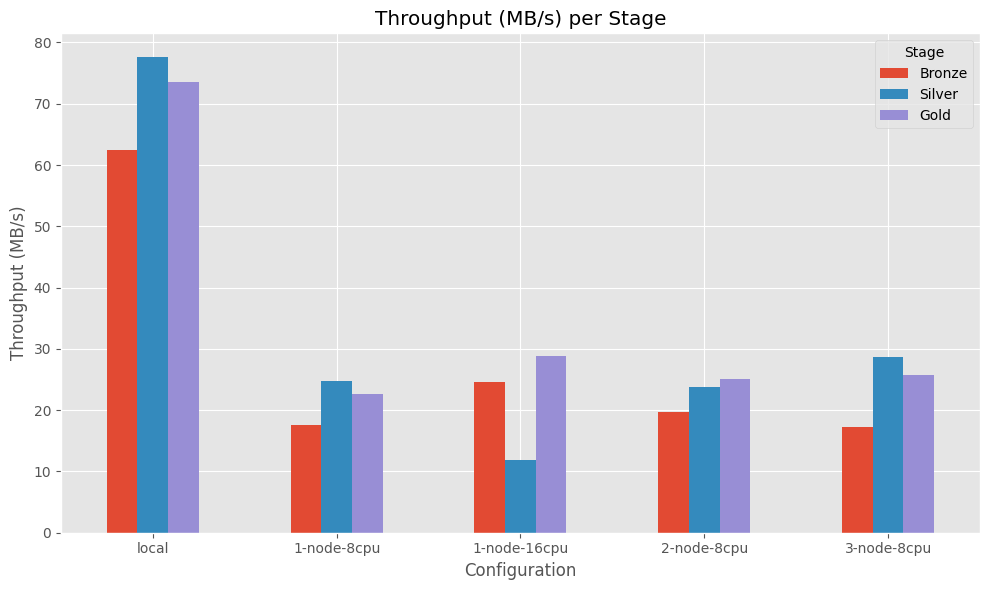

In [22]:
write_cols = ["throughput_bronze", "throughput_silver", "throughput_gold"]
df_avg_write = df_avg[["config"] + write_cols].set_index("config")
df_avg_write.columns = ["Bronze", "Silver", "Gold"]

df_avg_write.plot(kind="bar", figsize=(10, 6))
plt.title("Throughput (MB/s) per Stage")
plt.ylabel("Throughput (MB/s)")
plt.xlabel("Configuration")
plt.xticks(rotation=0)
plt.legend(title="Stage")
plt.tight_layout()
plt.show()

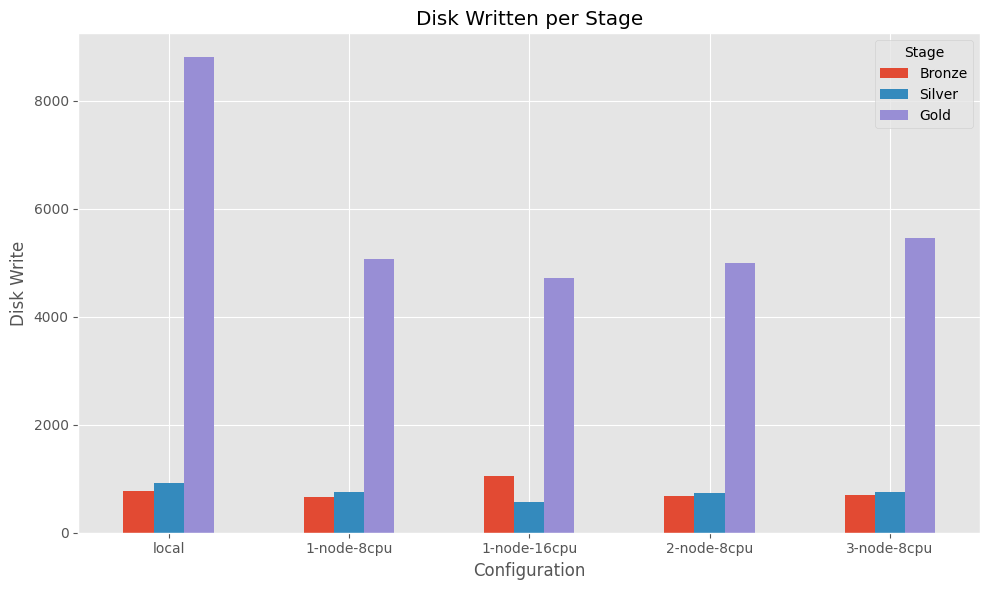

In [23]:
write_cols = ["write_bronze", "write_silver", "write_gold"]
df_avg_write = df_avg[["config"] + write_cols].set_index("config")
df_avg_write.columns = ["Bronze", "Silver", "Gold"]

df_avg_write.plot(kind="bar", figsize=(10, 6))
plt.title("Disk Written per Stage")
plt.ylabel("Disk Write")
plt.xlabel("Configuration")
plt.xticks(rotation=0)
plt.legend(title="Stage")
plt.tight_layout()
plt.show()

Received the error message in gold table after 25 runs

'''
java.io.IOException: No space left on device
'''

Explaination:

| Stage | Write Mode | What Gets Written Each Run | Does It Accumulate? | 
|-------|-----------|----------------------------|---------------------|
| **Bronze** | `append` | Raw CSV → Hive table (same files grow) | **No** – same directory, same HDFS blocks grow a little | 
| **Silver** | `append` | Filtered rows → 3 tables | **No** – small row‑group adds only | 
| **Gold** | `overwrite` | **Full union of _all_ bronze rows** | **YES** – every run writes a *new* directory; previous one moved to HDFS Trash | 

## What might happens at run 25

1. 
   ```python
   df_union.write.mode("overwrite").saveAsTable("gold_layer.all_batteries_gold")
   ```  
2. Spark writes to a **brand‑new directory** in  
   `…/warehouse/gold_layer.db/all_batteries_gold/…`.
3. The *previous* directory is **moved to `.Trash/`** .
4. After ~25 runs you hold ~25 full copies of the gold table — the DataNode returns  
   `java.io.IOException: No space left on device`.

_Local_ run never shows it (fast local FS, no HDFS Trash).  